<a href="https://colab.research.google.com/github/shlee0619/workStats/blob/main/1217.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분류 분석 (계속)

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
import seaborn as sns

## KNN 살펴보기

### 데이터 준비

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/hwda02/data/gym_data.xlsx', engine = 'openpyxl')
df.head()
# 피트니스센터 회원권 등록여부, 참여자의 나이, 연봉, 주당 평균 운동시간

,Enroll,Age,Income,Hours
0,1,26,18000,14
1,0,43,13000,9
2,1,55,42000,16
3,1,55,100000,13
4,0,55,13000,12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Enroll  1000 non-null   int64
 1   Age     1000 non-null   int64
 2   Income  1000 non-null   int64
 3   Hours   1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB


In [ ]:
df['Enroll'].unique()

array([1, 0])

In [ ]:
df['Enroll'].value_counts()

,count
Enroll,
0,597
1,403


In [ ]:
df.columns

Index(['Enroll', 'Age', 'Income', 'Hours'], dtype='object')

### Age 와 Income 변수로 KNN 알고리즘 살펴보기

In [ ]:
df.loc[:,['Age','Income']].describe()

,Age,Income
count,1000.000000,1000.000000
mean,44.582000,68340.000000
std,13.876737,44466.928247
min,21.000000,1000.000000
25%,32.000000,31000.000000
50%,45.000000,64000.000000
75%,57.000000,97000.000000
max,68.000000,198000.000000


In [ ]:
# 전체 데이터
X = df.loc[:,['Age','Income']]
y = df['Enroll']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (1000, 2)
y 데이터:  (1000,)


In [ ]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터 = 7:3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (700, 2)
test 데이터:  (300, 2)


### 모델 적용 - 원데이터

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# k 기본값 5
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# 정확도
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.84
0.7633333333333333


### 시각화

In [ ]:
X_train_array = np.column_stack((X_train.loc[:, 'Age'], X_train.loc[:, 'Income']))

In [ ]:
X_train_array

array([[    42,  91000],
       [    57,  78000],
       [    58, 142000],
       ...,
       [    65, 114000],
       [    52,  69000],
       [    31,  34000]])

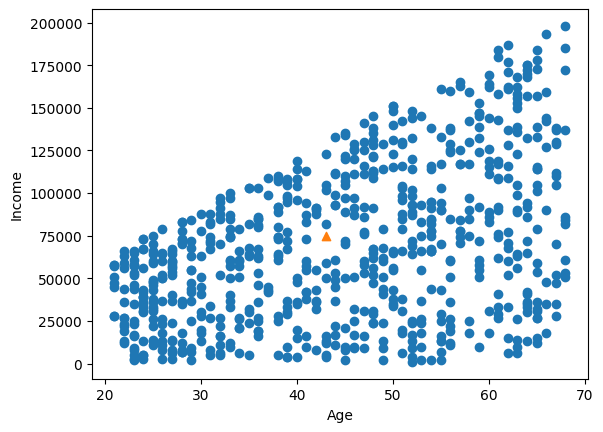

In [ ]:
# 산점도
plt.scatter(X_train_array[:,0], X_train_array[:,1])
plt.scatter(43, 75000, marker = '^') # new data point
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [ ]:
distance, indexes = knn.kneighbors([[43, 75000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
indexes

array([[684, 481, 340, 240, 608]])

In [ ]:
distance

array([[10., 10., 11., 15., 18.]])

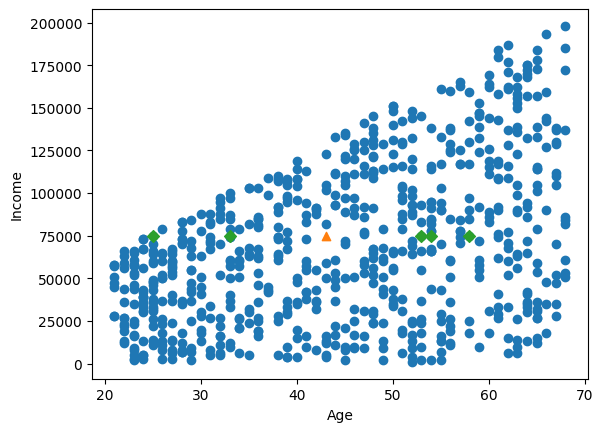

In [ ]:
# 산점도
plt.scatter(X_train_array[:,0], X_train_array[:,1])
plt.scatter(43, 75000, marker = '^')
plt.scatter(X_train_array[indexes,0], X_train_array[indexes,1], marker = 'D') # nearest data points
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [ ]:
print(X_train_array[indexes])

[[[   33 75000]
  [   53 75000]
  [   54 75000]
  [   58 75000]
  [   25 75000]]]


In [ ]:
print(distance)

[[10. 10. 11. 15. 18.]]


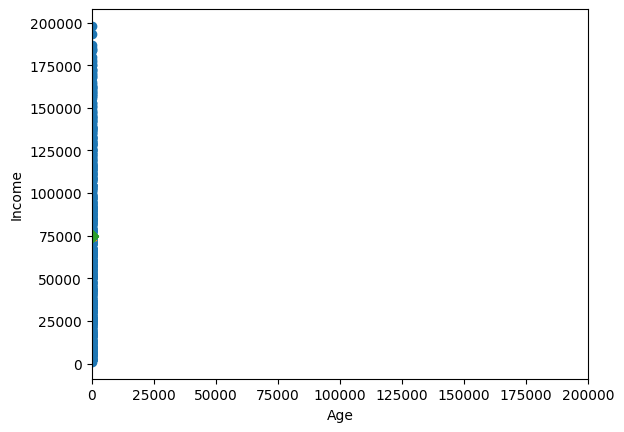

In [ ]:
# 산점도
plt.scatter(X_train_array[:,0], X_train_array[:,1])
plt.scatter(43, 75000, marker = '^')
plt.scatter(X_train_array[indexes,0], X_train_array[indexes,1], marker = 'D')
plt.xlim((0,200000)) # x 축의 범위를 y축과 동일하게 맞춤
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

### 모델 적용 - 표준화 데이터

In [ ]:
# 표준화 = z점수
mean = np.mean(X_train_array, axis  = 0)
std = np.std(X_train_array, axis  = 0)
print(mean, std)

[   44.6586 69010.    ] [   13.9222 45116.8155]


In [ ]:
X_train_scale = (X_train_array - mean) / std
X_train_scale

array([[-0.191 ,  0.4874],
       [ 0.8865,  0.1993],
       [ 0.9583,  1.6178],
       ...,
       [ 1.4611,  0.9972],
       [ 0.5273, -0.0002],
       [-0.9811, -0.776 ]])

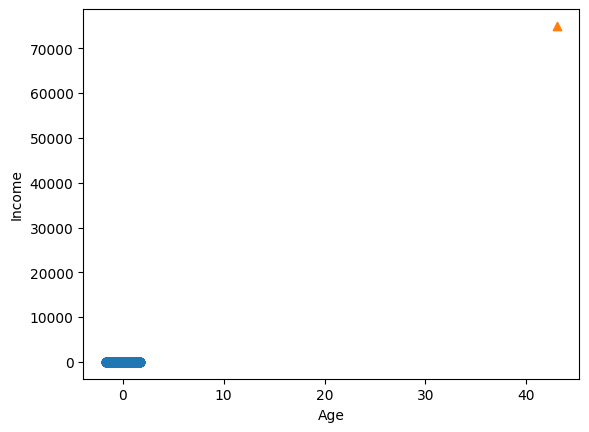

In [ ]:
# 산점도
plt.scatter(X_train_scale[:,0], X_train_scale[:,1])
plt.scatter(43, 75000, marker = '^')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [ ]:
new = ([43, 75000] - mean) / std
new

array([-0.1191,  0.1328])

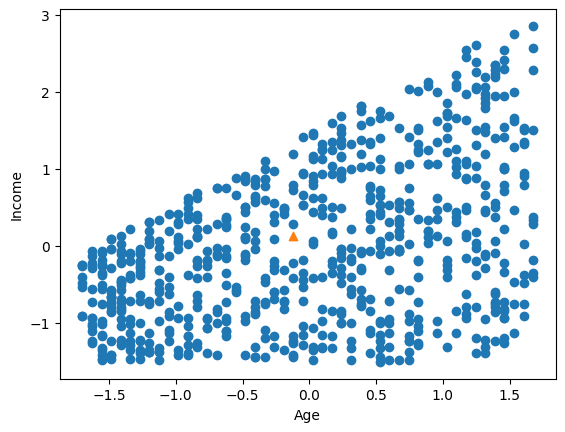

In [ ]:
# 산점도
plt.scatter(X_train_scale[:,0], X_train_scale[:,1])
plt.scatter(new[0], new[1], marker = '^')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [ ]:
# 새로운 데이터 훈련
knn.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [ ]:
distance, indexes = knn.kneighbors([new])

In [ ]:
indexes

array([[102, 353, 529,  96, 688]])

In [ ]:
distance

array([[0.1503, 0.1552, 0.1583, 0.1814, 0.2282]])

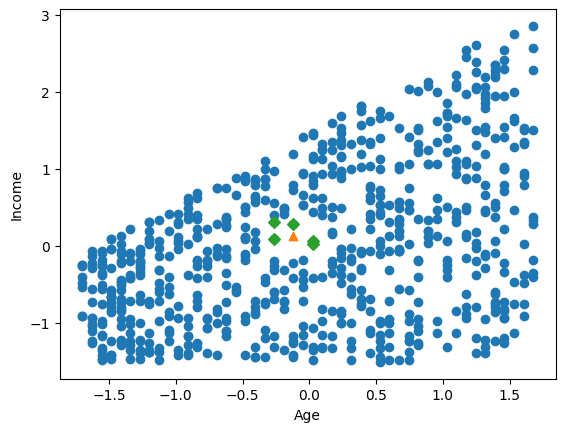

In [ ]:
# 산점도
plt.scatter(X_train_scale[:,0], X_train_scale[:,1])
plt.scatter(new[0], new[1], marker = '^')
plt.scatter(X_train_scale[indexes,0], X_train_scale[indexes,1], marker = 'D')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

## KNN - 데이터 분할

### 데이터 준비

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Enroll  1000 non-null   int64
 1   Age     1000 non-null   int64
 2   Income  1000 non-null   int64
 3   Hours   1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB


In [ ]:
# 데이터 분할
# 전체 데이터
X = df.loc[:,['Age', 'Income', 'Hours']]
y = df['Enroll']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (1000, 3)
y 데이터:  (1000,)


In [ ]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터 = 7:3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (700, 3)
test 데이터:  (300, 3)


In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
X_train_scale = standard.fit_transform(X_train)
X_test_scale = standard.transform(X_test)

In [ ]:
# 모델 적용
from sklearn.neighbors import KNeighborsClassifier
# 기본값 k = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [ ]:
# 정확도
print(knn.score(X_train_scale, y_train))
print(knn.score(X_test_scale, y_test))

0.9328571428571428
0.9333333333333333


In [ ]:
y_train_pred = knn.predict(X_train_scale)
y_test_pred = knn.predict(X_test_scale)

In [ ]:
print(y_train_pred[:5])
print(y_train.values[:5])

[0 1 1 0 0]
[0 1 0 0 0]


In [ ]:
print(y_test_pred[:5])
print(y_test.values[:5])

[0 0 1 0 0]
[0 0 1 0 0]


In [ ]:
y_train_proba = knn.predict_proba(X_train_scale)
y_test_proba = knn.predict_proba(X_test_scale)

In [ ]:
print(y_train_proba[:5])
print(y_test_proba[:5])

[[0.8 0.2]
 [0.  1. ]
 [0.4 0.6]
 [1.  0. ]
 [1.  0. ]]
[[1.  0. ]
 [0.8 0.2]
 [0.  1. ]
 [1.  0. ]
 [0.8 0.2]]


In [ ]:
# 성능평가
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[386  31]
 [ 16 267]]
[[169  11]
 [  9 111]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       417
           1       0.90      0.94      0.92       283

    accuracy                           0.93       700
   macro avg       0.93      0.93      0.93       700
weighted avg       0.93      0.93      0.93       700

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       180
           1       0.91      0.93      0.92       120

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



### 최적의 k값 찾기

In [ ]:
train_score = []
test_score = []
diff_score = []

for k in range(1, 11):
  knn = KNeighborsClassifier(n_neighbors = k)
  # 모델 훈련
  knn.fit(X_train_scale, y_train)
  # 점수 확인
  print("k = ", k)
  train_score.append(knn.score(X_train_scale, y_train))
  test_score.append(knn.score(X_test_scale, y_test))
  diff_score.append(knn.score(X_train_scale, y_train) - knn.score(X_test_scale, y_test))

k =  1
k =  2
k =  3
k =  4
k =  5
k =  6
k =  7
k =  8
k =  9
k =  10


In [ ]:
score_df = pd.DataFrame({'train_score': train_score,
                         'test_score': test_score,
                         'diff_score': diff_score})
score_df

,train_score,test_score,diff_score
0,1.000000,0.893333,0.106667
1,0.930000,0.863333,0.066667
2,0.938571,0.910000,0.028571
3,0.927143,0.896667,0.030476
4,0.932857,0.933333,-0.000476
5,0.915714,0.926667,-0.010952
6,0.918571,0.936667,-0.018095
7,0.907143,0.926667,-0.019524
8,0.915714,0.930000,-0.014286
9,0.902857,0.913333,-0.010476


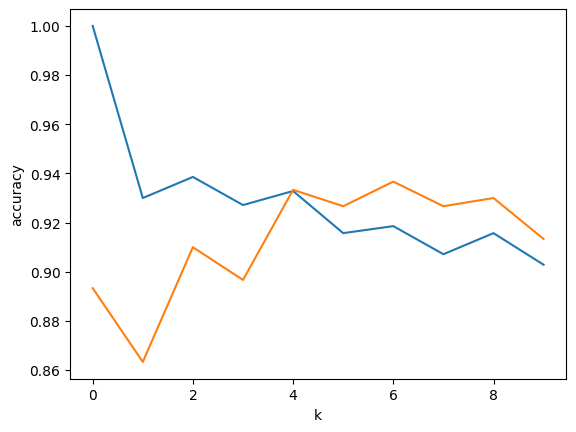

In [ ]:
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

### 최종 모델

In [ ]:
# 최종 모델
from sklearn.neighbors import KNeighborsClassifier
best_model = KNeighborsClassifier(n_neighbors=5)
best_model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [ ]:
# 정확도
print(best_model.score(X_train_scale, y_train))
print(best_model.score(X_test_scale, y_test))

0.9328571428571428
0.9333333333333333


In [ ]:
y_train_pred = best_model.predict(X_train_scale)
y_test_pred = best_model.predict(X_test_scale)

In [ ]:
print(y_train_pred[:5])
print(y_train.values[:5])

[0 1 1 0 0]
[0 1 0 0 0]


In [ ]:
print(y_test_pred[:5])
print(y_test.values[:5])

[0 0 1 0 0]
[0 0 1 0 0]


In [ ]:
y_train_proba = best_model.predict_proba(X_train_scale)
y_test_proba = best_model.predict_proba(X_test_scale)

In [ ]:
print(y_train_proba[:5])
print(y_test_proba[:5])

[[0.8 0.2]
 [0.  1. ]
 [0.4 0.6]
 [1.  0. ]
 [1.  0. ]]
[[1.  0. ]
 [0.8 0.2]
 [0.  1. ]
 [1.  0. ]
 [0.8 0.2]]


In [ ]:
# 성능평가
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[386  31]
 [ 16 267]]
[[169  11]
 [  9 111]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       417
           1       0.90      0.94      0.92       283

    accuracy                           0.93       700
   macro avg       0.93      0.93      0.93       700
weighted avg       0.93      0.93      0.93       700

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       180
           1       0.91      0.93      0.92       120

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



### ROC

In [ ]:
# ROC - 1 기준
y_test_proba1 = best_model.predict_proba(X_test_scale)[:,1]

In [ ]:
# FPR, TPR, Cutoff
from sklearn.metrics import roc_curve
fpr, tpr, cut = roc_curve(y_test, y_test_proba1)

In [ ]:
cut_index = np.arange(1, cut.shape[0])
print(np.round(cut[cut_index], 2)) # 임계값

# 임계값에 따른 fpr, tpr
print('fpr:',np.round(fpr[cut_index], 2))
print('tpr:',np.round(tpr[cut_index], 2))

[1.  0.8 0.6 0.4 0.2 0. ]
fpr: [0.02 0.05 0.06 0.12 0.27 1.  ]
tpr: [0.42 0.79 0.92 0.97 0.98 1.  ]


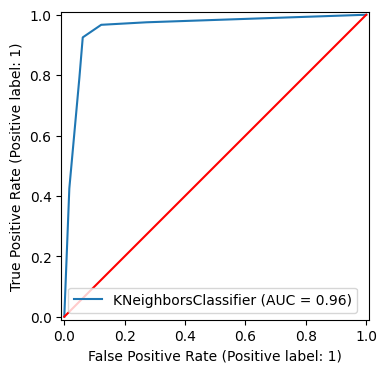

In [ ]:
# ROC Curve
from sklearn.metrics import RocCurveDisplay
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot()
RocCurveDisplay.from_estimator(best_model, X_test_scale, y_test, ax=ax)
ax.plot([0, 1], [0, 1], color='red')
ax.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, auc
print(roc_auc_score(y_test, y_test_proba1))
print(auc(fpr, tpr))

0.9554629629629631
0.9554629629629631


### 성능 개선

In [ ]:
# 회원권 등록하지 않은 사람들의 특성을 파악하여 회원 유치하는 것이 중요함
# 회원권 등록 안함이라고 예측하는 것이 중요
# = 회원권 등록했는데 안했다고 예측하는 것이 적은 것이 좋음 (FN↓)
# => TP / (TP + FN) = 재현율(민감도) 중요

In [ ]:
# 재현율을 높이는 것이 목표
y_test_proba[:,0][:5]

array([1. , 0.8, 0. , 1. , 0.8])

In [ ]:
y_test_pred[:5]

array([0, 0, 1, 0, 0])

In [ ]:
df['Enroll'].value_counts(normalize=True)

,proportion
Enroll,
0,0.597
1,0.403


In [ ]:
y_test_pred_new = np.where(y_test_proba[:,0] > 0.25, 0, 1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred_new))
# 재현율 증가

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       180
           1       0.91      0.93      0.92       120

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       180
           1       0.91      0.79      0.85       120

    accuracy                           0.89       300
   macro avg       0.89      0.87      0.88       300
weighted avg       0.89      0.89      0.89       300



### 새로운 데이터

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/hwda02/data/gym_score.xlsx', engine = 'openpyxl')
df.head()

,Age,Income,Hours
0,22,33000,5
1,23,65000,9
2,23,17000,15
3,24,21000,16
4,64,109000,20


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     23 non-null     int64
 1   Income  23 non-null     int64
 2   Hours   23 non-null     int64
dtypes: int64(3)
memory usage: 680.0 bytes


In [ ]:
df.describe()

,Age,Income,Hours
count,23.000000,23.000000,23.000000
mean,40.391304,60652.173913,11.434783
std,12.844309,28009.103546,6.604586
min,22.000000,17000.000000,3.000000
25%,28.000000,37000.000000,5.500000
50%,42.000000,65000.000000,9.000000
75%,48.500000,87000.000000,16.500000
max,64.000000,109000.000000,23.000000


In [ ]:
# 데이터 분할
# 전체 데이터
X = df.loc[:,['Age', 'Income', 'Hours']]

print("X 데이터: ", X.shape)

X 데이터:  (23, 3)


In [ ]:
# 표준화
X_scale = standard.transform(X)

In [ ]:
y_score = best_model.predict(X_scale)

In [ ]:
new_data = pd.concat([X, pd.Series(y_score)], axis = 1)
new_data.head()

,Age,Income,Hours,0
0,22,33000,5,0
1,23,65000,9,1
2,23,17000,15,0
3,24,21000,16,0
4,64,109000,20,1


In [ ]:
new_data = new_data.rename(columns = {0: 'y_score'})
new_data

,Age,Income,Hours,y_score
0,22,33000,5,0
1,23,65000,9,1
2,23,17000,15,0
3,24,21000,16,0
4,64,109000,20,1
5,39,67000,12,0
6,47,69000,21,0
7,37,34000,5,0
8,50,25000,9,0
9,35,87000,22,0


In [ ]:
class_y = new_data[new_data['y_score'] == 1]
class_n = new_data[new_data['y_score'] == 0]

In [ ]:
class_yn = new_data.groupby(by = 'y_score')

In [ ]:
# 반복문으로 그룹 객체 확인
for i, j in class_yn:
  print("그룹의 이름: ", i) # 그룹의 이름
  print(j.head()) # 그룹에 해당하는 데이터

그룹의 이름:  0
   Age  Income  Hours  y_score
0   22   33000      5        0
2   23   17000     15        0
3   24   21000     16        0
5   39   67000     12        0
6   47   69000     21        0
그룹의 이름:  1
    Age  Income  Hours  y_score
1    23   65000      9        1
4    64  109000     20        1
12   57   56000     11        1
15   61   27000      9        1
18   54   87000      4        1


In [ ]:
class_y = class_yn.get_group(1)
class_n = class_yn.get_group(0)

In [ ]:
print(class_y.shape, class_n.shape)

(7, 4) (16, 4)


In [ ]:
print(class_y.describe())
print(class_n.describe())
# 등록하는 사람은 상대적으로 나이가 많고, 소득도 많은 편

             Age         Income      Hours  y_score
count   7.000000       7.000000   7.000000      7.0
mean   50.714286   76714.285714  10.857143      1.0
std    13.744263   29193.117258   5.756983      0.0
min    23.000000   27000.000000   4.000000      1.0
25%    48.000000   60500.000000   7.500000      1.0
50%    54.000000   87000.000000   9.000000      1.0
75%    59.000000   96500.000000  14.000000      1.0
max    64.000000  109000.000000  20.000000      1.0
             Age        Income      Hours  y_score
count  16.000000     16.000000  16.000000     16.0
mean   35.875000  53625.000000  11.687500      0.0
std     9.742518  25231.924223   7.106042      0.0
min    22.000000  17000.000000   3.000000      0.0
25%    24.750000  33750.000000   5.000000      0.0
50%    38.000000  52000.000000  10.000000      0.0
75%    44.250000  67500.000000  17.250000      0.0
max    50.000000  97000.000000  23.000000      0.0


In [ ]:
# 독립표본 t 검정
# 등분산 검정
from scipy.stats import levene
print(levene(class_n['Age'], class_y['Age']))
print(levene(class_n['Income'], class_y['Income']))
print(levene(class_n['Hours'], class_y['Hours']))

LeveneResult(statistic=0.05483483234550503, pvalue=0.817122140638606)
LeveneResult(statistic=0.003142749228565524, pvalue=0.9558237900981071)
LeveneResult(statistic=0.9636077836320205, pvalue=0.33745441904384843)


In [ ]:
# 등분산 가정
from scipy.stats import ttest_ind
print("Age: ", class_n['Age'].mean(), "vs.", class_y['Age'].mean())
print(ttest_ind(class_n['Age'], class_y['Age'], equal_var=True))

print("Income: ", class_n['Income'].mean(), "vs.", class_y['Income'].mean())
print(ttest_ind(class_n['Income'], class_y['Income'], equal_var=True))

print("Hours: ", class_n['Hours'].mean(), "vs.", class_y['Hours'].mean())
print(ttest_ind(class_n['Hours'], class_y['Hours'], equal_var=True))

Age:  35.875 vs. 50.714285714285715
TtestResult(statistic=-2.967475959148584, pvalue=0.007347433733680799, df=21.0)
Income:  53625.0 vs. 76714.28571428571
TtestResult(statistic=-1.9281959964770075, pvalue=0.0674611792587549, df=21.0)
Hours:  11.6875 vs. 10.857142857142858
TtestResult(statistic=0.27153374230163485, pvalue=0.7886320062315595, df=21.0)


## KNN - 타이타닉데이터

### 데이터 준비

In [ ]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### 데이터 전처리

In [ ]:
# deck => 결측치 50% 이상이어서 열 삭제
# embark_town  & embarked => 같은 변수이어서 하나 열 삭제
# age => 편의상 결측치 제거 (대체-평균, 중앙값, 모델 예측값)
# embarked => 결측치 대체(최빈값)

In [ ]:
# age
(891-714)/891

0.19865319865319866

In [ ]:
df[['embarked', 'embark_town']]

,embarked,embark_town
0,S,Southampton
1,C,Cherbourg
2,S,Southampton
3,S,Southampton
4,S,Southampton
...,...,...
886,S,Southampton
887,S,Southampton
888,S,Southampton
889,C,Cherbourg


In [ ]:
df['deck'].value_counts(dropna = False)

,count
deck,
NaN,688
C,59
B,47
D,33
E,32
A,15
F,13
G,4


In [ ]:
# 열 삭제
df_new = df.drop(['deck', 'embark_town'], axis = 1)

In [ ]:
# 결측치 삭제
df_new = df_new.dropna(subset = ['age'], how = 'any', axis = 0)

In [ ]:
df_new['embarked'].value_counts(dropna = False)

,count
embarked,
S,554
C,130
Q,28
NaN,2


In [ ]:
mode_embarked = df_new['embarked'].value_counts().idxmax()

In [ ]:
# 결측치 대체
df_new['embarked'] = df_new['embarked'].fillna(mode_embarked)

In [ ]:
df_new['embarked'].value_counts(dropna = False)

,count
embarked,
S,556
C,130
Q,28


In [ ]:
df_new.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,no,True


In [ ]:
# 특성 선택
df_new = df_new[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]

In [ ]:
df_new.head()

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [ ]:
# 데이터 분할
# 전체 데이터
X = df_new.iloc[:,1:]
y = df_new['survived']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (714, 6)
y 데이터:  (714,)


In [ ]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터 = 7:3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (499, 6)
test 데이터:  (215, 6)


### 더미변수

In [ ]:
# sex => 원핫인코딩(더미변수)
# embarked => 원핫인코딩(더미변수)

In [ ]:
X_train_dm = pd.get_dummies(X_train[['sex', 'embarked']])
X_train_dm.head()

,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
37,False,True,False,False,True
58,True,False,False,False,True
57,False,True,True,False,False
94,False,True,False,False,True
209,False,True,True,False,False


In [ ]:
X_test_dm = pd.get_dummies(X_test[['sex', 'embarked']])
X_test_dm.head()

,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
149,False,True,False,False,True
407,False,True,False,False,True
53,True,False,False,False,True
369,True,False,True,False,False
818,False,True,False,False,True


In [ ]:
X_train = pd.concat([X_train, X_train_dm], axis = 1)
X_train.head()

,pclass,sex,age,sibsp,parch,embarked,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
37,3,male,21.0,0,0,S,False,True,False,False,True
58,2,female,5.0,1,2,S,True,False,False,False,True
57,3,male,28.5,0,0,C,False,True,True,False,False
94,3,male,59.0,0,0,S,False,True,False,False,True
209,1,male,40.0,0,0,C,False,True,True,False,False


In [ ]:
X_test = pd.concat([X_test, X_test_dm], axis = 1)
X_test.head()

,pclass,sex,age,sibsp,parch,embarked,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
149,2,male,42.0,0,0,S,False,True,False,False,True
407,2,male,3.0,1,1,S,False,True,False,False,True
53,2,female,29.0,1,0,S,True,False,False,False,True
369,1,female,24.0,0,0,C,True,False,True,False,False
818,3,male,43.0,0,0,S,False,True,False,False,True


In [ ]:
X_train = X_train.drop(['sex', 'embarked'], axis = 1)
X_train.head()

,pclass,age,sibsp,parch,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
37,3,21.0,0,0,False,True,False,False,True
58,2,5.0,1,2,True,False,False,False,True
57,3,28.5,0,0,False,True,True,False,False
94,3,59.0,0,0,False,True,False,False,True
209,1,40.0,0,0,False,True,True,False,False


In [ ]:
X_test = X_test.drop(['sex', 'embarked'], axis = 1)
X_test.head()

,pclass,age,sibsp,parch,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
149,2,42.0,0,0,False,True,False,False,True
407,2,3.0,1,1,False,True,False,False,True
53,2,29.0,1,0,True,False,False,False,True
369,1,24.0,0,0,True,False,True,False,False
818,3,43.0,0,0,False,True,False,False,True


In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
X_train_scale = standard.fit_transform(X_train)
X_test_scale = standard.transform(X_test)
print(X_train_scale[:5])
print(X_test_scale[:5])

[[ 0.9357 -0.6292 -0.5462 -0.495  -0.7479  0.7479 -0.4659 -0.2096  0.5318]
 [-0.2524 -1.7061  0.5754  1.7709  1.3371 -1.3371 -0.4659 -0.2096  0.5318]
 [ 0.9357 -0.1244 -0.5462 -0.495  -0.7479  0.7479  2.1463 -0.2096 -1.8805]
 [ 0.9357  1.9284 -0.5462 -0.495  -0.7479  0.7479 -0.4659 -0.2096  0.5318]
 [-1.4405  0.6496 -0.5462 -0.495  -0.7479  0.7479  2.1463 -0.2096 -1.8805]]
[[-0.2524  0.7842 -0.5462 -0.495  -0.7479  0.7479 -0.4659 -0.2096  0.5318]
 [-0.2524 -1.8407  0.5754  0.638  -0.7479  0.7479 -0.4659 -0.2096  0.5318]
 [-0.2524 -0.0907  0.5754 -0.495   1.3371 -1.3371 -0.4659 -0.2096  0.5318]
 [-1.4405 -0.4273 -0.5462 -0.495   1.3371 -1.3371  2.1463 -0.2096 -1.8805]
 [ 0.9357  0.8515 -0.5462 -0.495  -0.7479  0.7479 -0.4659 -0.2096  0.5318]]


In [ ]:
# 모델 적용
from sklearn.neighbors import KNeighborsClassifier
# 기본값 k = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [ ]:
# 정확도
print(knn.score(X_train_scale, y_train))
print(knn.score(X_test_scale, y_test))

0.8517034068136272
0.786046511627907


### 최적의 k값 찾기

In [ ]:
train_score = []
test_score = []
diff_score = []

for k in range(1, 11):
  knn = KNeighborsClassifier(n_neighbors = k)
  # 모델 훈련
  knn.fit(X_train_scale, y_train)
  # 점수 확인
  print("k = ", k)
  train_score.append(knn.score(X_train_scale, y_train))
  test_score.append(knn.score(X_test_scale, y_test))
  diff_score.append(knn.score(X_train_scale, y_train) - knn.score(X_test_scale, y_test))

k =  1
k =  2
k =  3
k =  4
k =  5
k =  6
k =  7
k =  8
k =  9
k =  10


In [ ]:
score_df = pd.DataFrame({'train_score': train_score,
                         'test_score': test_score,
                         'diff_score': diff_score})
score_df

,train_score,test_score,diff_score
0,0.939880,0.725581,0.214298
1,0.875752,0.772093,0.103658
2,0.879760,0.790698,0.089062
3,0.851703,0.795349,0.056355
4,0.851703,0.786047,0.065657
5,0.845691,0.790698,0.054994
6,0.857715,0.809302,0.048413
7,0.851703,0.786047,0.065657
8,0.851703,0.790698,0.061006
9,0.839679,0.781395,0.058284


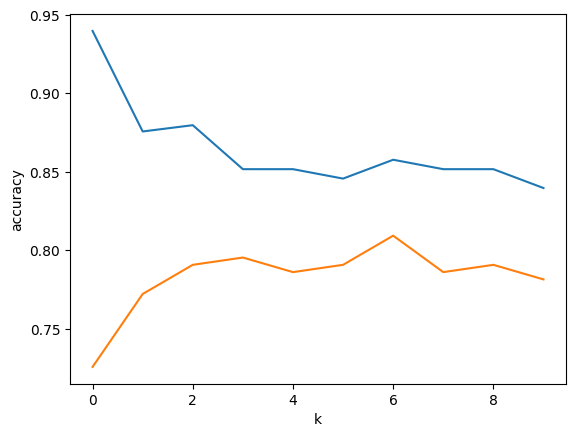

In [ ]:
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

### 최종모델

In [ ]:
# 모델 적용
from sklearn.neighbors import KNeighborsClassifier
# k = 7
best_model = KNeighborsClassifier(n_neighbors=7)
best_model.fit(X_train_scale, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
# 정확도
print(best_model.score(X_train_scale, y_train))
print(best_model.score(X_test_scale, y_test))

0.8577154308617234
0.8093023255813954


In [ ]:
y_train_pred = best_model.predict(X_train_scale)
y_test_pred = best_model.predict(X_test_scale)

In [ ]:
print(y_train_pred[:5])
print(y_train.values[:5])

[0 1 0 0 1]
[0 1 0 0 1]


In [ ]:
print(y_test_pred[:5])
print(y_test.values[:5])

[0 1 1 1 0]
[0 1 1 1 0]


In [ ]:
y_train_proba = best_model.predict_proba(X_train_scale)
y_test_proba = best_model.predict_proba(X_test_scale)

In [ ]:
print(y_train_proba[:5])
print(y_test_proba[:5])

[[1.     0.    ]
 [0.1429 0.8571]
 [0.8571 0.1429]
 [1.     0.    ]
 [0.2857 0.7143]]
[[0.8571 0.1429]
 [0.1429 0.8571]
 [0.2857 0.7143]
 [0.     1.    ]
 [0.8571 0.1429]]


In [ ]:
# 성능평가
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[271  27]
 [ 44 157]]
[[108  18]
 [ 23  66]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       298
           1       0.85      0.78      0.82       201

    accuracy                           0.86       499
   macro avg       0.86      0.85      0.85       499
weighted avg       0.86      0.86      0.86       499

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       126
           1       0.79      0.74      0.76        89

    accuracy                           0.81       215
   macro avg       0.81      0.80      0.80       215
weighted avg       0.81      0.81      0.81       215



### ROC

In [ ]:
# ROC - 1 기준
y_test_proba1 = best_model.predict_proba(X_test_scale)[:,1]

In [ ]:
# FPR, TPR, Cutoff
from sklearn.metrics import roc_curve
fpr, tpr, cut = roc_curve(y_test, y_test_proba1)

In [ ]:
cut_index = np.arange(1, cut.shape[0])
print(np.round(cut[cut_index], 2)) # 임계값

# 임계값에 따른 fpr, tpr
print('fpr:',np.round(fpr[cut_index], 2))
print('tpr:',np.round(tpr[cut_index], 2))

[1.   0.86 0.71 0.57 0.43 0.29 0.14 0.  ]
fpr: [0.02 0.05 0.1  0.14 0.21 0.44 0.76 1.  ]
tpr: [0.34 0.53 0.63 0.74 0.79 0.9  0.96 1.  ]


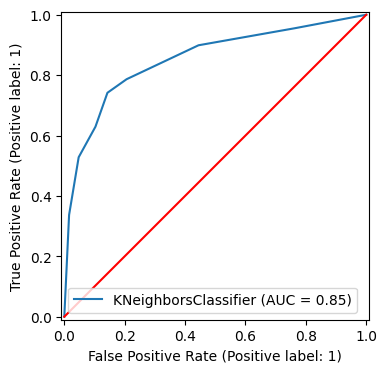

In [ ]:
# ROC Curve
from sklearn.metrics import RocCurveDisplay
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot()
RocCurveDisplay.from_estimator(best_model, X_test_scale, y_test, ax=ax)
ax.plot([0, 1], [0, 1], color='red')
ax.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, auc
print(roc_auc_score(y_test, y_test_proba1))
print(auc(fpr, tpr))

0.8519261637239166
0.8519261637239166


## NB

### 조건부확률

In [ ]:
0.5 * 0.2 / 0.6

0.16666666666666669

### 스팸 메일 분류 개념 연습

In [ ]:
normal_mail = pd.DataFrame({'word': ['사랑하는', '친구에게', '점심', '돈'],
                                             'count': [8, 5, 3, 1]})
normal_mail

,word,count
0,사랑하는,8
1,친구에게,5
2,점심,3
3,돈,1


In [ ]:
spam_mail = pd.DataFrame({'word': ['사랑하는', '친구에게', '점심', '돈'],
                                             'count': [2, 1, 0, 4]})
spam_mail

,word,count
0,사랑하는,2
1,친구에게,1
2,점심,0
3,돈,4


In [ ]:
# 단어가 나올 확률
# 정상 메일
normal_mail['p'] = round(normal_mail['count'] / sum(normal_mail['count']), 2)
normal_mail

,word,count,p
0,사랑하는,8,0.47
1,친구에게,5,0.29
2,점심,3,0.18
3,돈,1,0.06


In [ ]:
# 스팸 메일
spam_mail['p'] = round(spam_mail['count'] / sum(spam_mail['count']), 2)
spam_mail

,word,count,p
0,사랑하는,2,0.29
1,친구에게,1,0.14
2,점심,0,0.00
3,돈,4,0.57


In [ ]:
# 사전 확률
normal_mail_count = 8; spam_mail_count = 4
normal_mail_p = round(normal_mail_count / (normal_mail_count + spam_mail_count), 2)
spam_mail_p = round(spam_mail_count / (normal_mail_count + spam_mail_count), 2)
print(normal_mail_p, spam_mail_p)

0.67 0.33


In [ ]:
# 사랑하는 친구에게 라는 메일이 정상 메일일 확률
round(normal_mail_p * normal_mail.iloc[0,2] * normal_mail.iloc[1,2], 2)

0.09

In [ ]:
# 사랑하는 친구에게 라는 메일이 스팸 메일일 확률
round(spam_mail_p * spam_mail.iloc[0,2] * spam_mail.iloc[1,2], 2)

0.01

### 데이터 불러오기

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/hwda02/data/census_data.xlsx', engine = 'openpyxl')
df.head()
# 결혼여부, 여성여부, 백인여부, 연령군, 대학교육여부, 소득빈곤여부
# 연령군 1: 18~24, 2: 25~34, 3: 35~44, 4: 45~54, 5: 55~

,Married,Female,White,Age,Edu,Poverty
0,Y,N,Y,1,N,0
1,Y,N,Y,1,N,0
2,Y,N,Y,1,Y,0
3,N,N,Y,1,Y,1
4,N,N,N,1,N,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9980 entries, 0 to 9979
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Married  9980 non-null   object
 1   Female   9980 non-null   object
 2   White    9980 non-null   object
 3   Age      9980 non-null   int64 
 4   Edu      9980 non-null   object
 5   Poverty  9980 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 467.9+ KB


In [ ]:
# y 변수 검토
df['Poverty'].unique()

array([0, 1])

In [ ]:
df['Poverty'].value_counts()

,count
Poverty,
1,7788
0,2192


In [ ]:
df['Poverty'].value_counts(normalize=True)

,proportion
Poverty,
1,0.780361
0,0.219639


### 분석

In [ ]:
df.head()

,Married,Female,White,Age,Edu,Poverty
0,Y,N,Y,1,N,0
1,Y,N,Y,1,N,0
2,Y,N,Y,1,Y,0
3,N,N,Y,1,Y,1
4,N,N,N,1,N,1


In [ ]:
# 데이터 분할
# 전체 데이터
X = df.iloc[:,0:-1]
y = df['Poverty']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (9980, 5)
y 데이터:  (9980,)


In [ ]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터 = 7:3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (6986, 5)
test 데이터:  (2994, 5)


In [ ]:
dummy_vars = ['Married', 'Female', 'White', 'Edu']
X_train_dm = pd.get_dummies(X_train[dummy_vars])
X_train_dm.head()

,Married_N,Married_Y,Female_N,Female_Y,White_N,White_Y,Edu_N,Edu_Y
1777,True,False,False,True,False,True,True,False
6060,True,False,False,True,False,True,False,True
751,True,False,True,False,False,True,True,False
9719,True,False,False,True,False,True,False,True
4023,True,False,False,True,False,True,True,False


In [ ]:
X_test_dm = pd.get_dummies(X_test[dummy_vars])
X_test_dm.head()

,Married_N,Married_Y,Female_N,Female_Y,White_N,White_Y,Edu_N,Edu_Y
1253,True,False,False,True,False,True,False,True
8224,True,False,True,False,False,True,True,False
1658,True,False,False,True,False,True,True,False
7733,True,False,False,True,False,True,True,False
1441,True,False,False,True,False,True,True,False


In [ ]:
X_train_dm = X_train_dm.iloc[:,[1,3,5,7]]
X_train_dm.head()

,Married_Y,Female_Y,White_Y,Edu_Y
1777,False,True,True,False
6060,False,True,True,True
751,False,False,True,False
9719,False,True,True,True
4023,False,True,True,False


In [ ]:
X_test_dm = X_test_dm.iloc[:,[1,3,5,7]]
X_test_dm.head()

,Married_Y,Female_Y,White_Y,Edu_Y
1253,False,True,True,True
8224,False,False,True,False
1658,False,True,True,False
7733,False,True,True,False
1441,False,True,True,False


In [ ]:
X_train.head()

,Married,Female,White,Age,Edu
1777,N,Y,Y,1,N
6060,N,Y,Y,3,Y
751,N,N,Y,1,N
9719,N,Y,Y,5,Y
4023,N,Y,Y,2,N


In [ ]:
# 더미변수 변환된 데이터와 합치기
X_train = pd.concat([X_train_dm, X_train['Age']], axis = 1)
X_train.head()

,Married_Y,Female_Y,White_Y,Edu_Y,Age
1777,False,True,True,False,1
6060,False,True,True,True,3
751,False,False,True,False,1
9719,False,True,True,True,5
4023,False,True,True,False,2


In [ ]:
# 더미변수 변환된 데이터와 합치기
X_test = pd.concat([X_test_dm, X_test['Age']], axis = 1)
X_test.head()

,Married_Y,Female_Y,White_Y,Edu_Y,Age
1253,False,True,True,True,1
8224,False,False,True,False,5
1658,False,True,True,False,1
7733,False,True,True,False,4
1441,False,True,True,False,1


### 모델 훈련 및 평가 - CategoricalNB

In [ ]:
# 모델 훈련
from sklearn.naive_bayes import CategoricalNB
nb = CategoricalNB()
nb.fit(X_train, y_train)

CategoricalNB()

In [ ]:
# 피처들이 범주형 변수일 때 사용

In [ ]:
# 정확도
print(nb.score(X_train, y_train))
print(nb.score(X_test, y_test))

0.7948754652161466
0.8002672010688042


In [ ]:
y_train_pred = nb.predict(X_train)
y_test_pred = nb.predict(X_test)

In [ ]:
print(y_train_pred[:5])
print(y_train.values[:5])

[1 1 1 1 1]
[1 1 1 1 1]


In [ ]:
print(y_test_pred[:5])
print(y_test.values[:5])

[1 1 1 1 1]
[1 1 1 1 1]


In [ ]:
y_train_proba = nb.predict_proba(X_train)
y_test_proba = nb.predict_proba(X_test)

In [ ]:
print(y_train_proba[:5])
print(y_test_proba[:5])

[[0.0007 0.9993]
 [0.0416 0.9584]
 [0.0024 0.9976]
 [0.0388 0.9612]
 [0.0076 0.9924]]
[[0.0017 0.9983]
 [0.0525 0.9475]
 [0.0007 0.9993]
 [0.0233 0.9767]
 [0.0007 0.9993]]


In [ ]:
# 성능평가
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[ 916  620]
 [ 813 4637]]
[[ 384  272]
 [ 326 2012]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.53      0.60      0.56      1536
           1       0.88      0.85      0.87      5450

    accuracy                           0.79      6986
   macro avg       0.71      0.72      0.71      6986
weighted avg       0.80      0.79      0.80      6986

              precision    recall  f1-score   support

           0       0.54      0.59      0.56       656
           1       0.88      0.86      0.87      2338

    accuracy                           0.80      2994
   macro avg       0.71      0.72      0.72      2994
weighted avg       0.81      0.80      0.80      2994



In [ ]:
# ROC - 1 기준
y_test_proba1 = nb.predict_proba(X_test)[:,1]

In [ ]:
# FPR, TPR, Cutoff
from sklearn.metrics import roc_curve
fpr, tpr, cut = roc_curve(y_test, y_test_proba1)

In [ ]:
cut_index = np.arange(1, cut.shape[0])
print(np.round(cut[cut_index], 2)) # 임계값

# 임계값에 따른 fpr, tpr
print('fpr:',np.round(fpr[cut_index], 2))
print('tpr:',np.round(tpr[cut_index], 2))

[1.   1.   1.   1.   1.   1.   1.   1.   0.99 0.99 0.99 0.99 0.99 0.99
 0.99 0.99 0.99 0.99 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.97 0.97 0.97
 0.97 0.97 0.97 0.96 0.96 0.96 0.96 0.96 0.95 0.94 0.94 0.94 0.94 0.94
 0.93 0.92 0.92 0.91 0.89 0.89 0.88 0.88 0.87 0.87 0.84 0.83 0.83 0.8
 0.78 0.77 0.74 0.73 0.71 0.69 0.68 0.68 0.66 0.61 0.61 0.59 0.53 0.52
 0.52 0.5  0.48 0.46 0.44 0.38 0.32 0.3  0.24]
fpr: [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.01 0.01 0.01 0.01 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.03 0.03 0.04 0.04 0.04 0.04 0.05 0.06 0.06 0.06 0.07 0.07
 0.08 0.08 0.08 0.08 0.09 0.09 0.1  0.1  0.12 0.12 0.12 0.14 0.14 0.15
 0.15 0.17 0.17 0.18 0.21 0.21 0.22 0.22 0.23 0.24 0.25 0.28 0.35 0.36
 0.41 0.49 0.5  0.52 0.56 0.57 0.68 0.83 1.  ]
tpr: [0.01 0.04 0.05 0.06 0.11 0.17 0.18 0.19 0.19 0.24 0.27 0.27 0.28 0.29
 0.29 0.3  0.3  0.31 0.33 0.35 0.35 0.38 0.38 0.39 0.41 0.44 0.44 0.44
 0.45 0.45 0.46 0.47 0.49 0.5  0.52 0.52 0.54 0

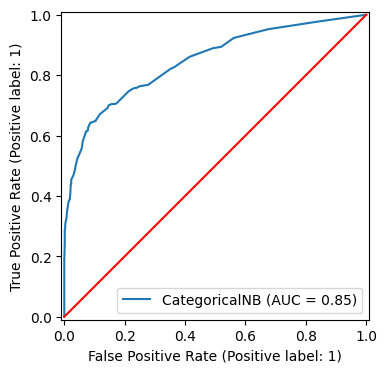

In [ ]:
# ROC Curve
from sklearn.metrics import RocCurveDisplay
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot()
RocCurveDisplay.from_estimator(nb, X_test, y_test, ax=ax)
ax.plot([0, 1], [0, 1], color='red')
ax.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, auc
print(roc_auc_score(y_test, y_test_proba1))
print(auc(fpr, tpr))

0.8458797779006446
0.8458797779006446


### 성능 개선

In [ ]:
# 소득이 빈곤 수준인 사람들의 특성을 이해하는 것이 중요함
# 빈곤이라고 잘 예측하는 것이 중요
# = 빈곤이라고 예측한 것 중에서 빈곤이 아닌 것이 적은 것이 좋음 (FP↓)
# => TP / (TP + FP) = 정밀도가 중요

In [ ]:
# 정밀도를 높이는 것이 목표
y_test_proba[:,1]

array([0.9983, 0.9475, 0.9993, ..., 0.9735, 0.5336, 0.984 ])

In [ ]:
y_test_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
y_test_pred_new = np.where(y_test_proba[:,1] > 0.75, 1, 0)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred_new))

              precision    recall  f1-score   support

           0       0.54      0.59      0.56       656
           1       0.88      0.86      0.87      2338

    accuracy                           0.80      2994
   macro avg       0.71      0.72      0.72      2994
weighted avg       0.81      0.80      0.80      2994

              precision    recall  f1-score   support

           0       0.44      0.83      0.58       656
           1       0.94      0.70      0.80      2338

    accuracy                           0.73      2994
   macro avg       0.69      0.77      0.69      2994
weighted avg       0.83      0.73      0.75      2994



### 새로운 데이터

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/hwda02/data/census_score.xlsx', engine = 'openpyxl')
df.head()

,Married,Female,White,Age,Edu
0,N,Y,Y,5,N
1,N,Y,Y,5,N
2,N,Y,N,5,Y
3,N,Y,Y,5,N
4,N,Y,Y,3,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Married  66 non-null     object
 1   Female   66 non-null     object
 2   White    66 non-null     object
 3   Age      66 non-null     int64 
 4   Edu      66 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.7+ KB


In [ ]:
# 데이터 분할
# 전체 데이터
X = df

print("X 데이터: ", X.shape)

X 데이터:  (66, 5)


In [ ]:
# 더미변수
dummy_vars = ['Married', 'Female', 'White', 'Edu']
X_dm = pd.get_dummies(X[dummy_vars])
X_dm.head()

,Married_N,Married_Y,Female_N,Female_Y,White_N,White_Y,Edu_N,Edu_Y
0,True,False,False,True,False,True,True,False
1,True,False,False,True,False,True,True,False
2,True,False,False,True,True,False,False,True
3,True,False,False,True,False,True,True,False
4,True,False,False,True,False,True,False,True


In [ ]:
X_dm = X_dm.iloc[:,[1,3,5,7]]
X_dm.head()

,Married_Y,Female_Y,White_Y,Edu_Y
0,False,True,True,False
1,False,True,True,False
2,False,True,False,True
3,False,True,True,False
4,False,True,True,True


In [ ]:
X.head()

,Married,Female,White,Age,Edu
0,N,Y,Y,5,N
1,N,Y,Y,5,N
2,N,Y,N,5,Y
3,N,Y,Y,5,N
4,N,Y,Y,3,Y


In [ ]:
X = pd.concat([X_dm, X['Age']], axis = 1)
X.head()

,Married_Y,Female_Y,White_Y,Edu_Y,Age
0,False,True,True,False,5
1,False,True,True,False,5
2,False,True,False,True,5
3,False,True,True,False,5
4,False,True,True,True,3


In [ ]:
y_score = nb.predict(X)

In [ ]:
new_data = pd.concat([X, pd.Series(y_score)], axis = 1)
new_data.head()

,Married_Y,Female_Y,White_Y,Edu_Y,Age,0
0,False,True,True,False,5,1
1,False,True,True,False,5,1
2,False,True,False,True,5,1
3,False,True,True,False,5,1
4,False,True,True,True,3,1


In [ ]:
new_data = new_data.rename(columns = {0: 'y_score'})

In [ ]:
new_data.head()

,Married_Y,Female_Y,White_Y,Edu_Y,Age,y_score
0,False,True,True,False,5,1
1,False,True,True,False,5,1
2,False,True,False,True,5,1
3,False,True,True,False,5,1
4,False,True,True,True,3,1


In [ ]:
print(pd.crosstab(new_data['Married_Y'], new_data['y_score']))
print(pd.crosstab(new_data['Female_Y'], new_data['y_score']))
print(pd.crosstab(new_data['White_Y'], new_data['y_score']))
print(pd.crosstab(new_data['Edu_Y'], new_data['y_score']))
print(pd.crosstab(new_data['Age'], new_data['y_score']))
# 상대적으로 결혼한 남성들이 빈곤에 처할 가능성이 낮은 것으로 분류하는 경향이 보임
# = 결혼을 안하면 빈곤에 처할 가능성이 높다

y_score    0   1
Married_Y       
False      0  52
True       6   8
y_score   0   1
Female_Y       
False     6  34
True      0  26
y_score  0   1
White_Y       
False    1   5
True     5  55
y_score  0   1
Edu_Y         
False    1  21
True     5  39
y_score  0   1
Age           
1        0   3
2        0   5
3        1  14
4        1  12
5        4  26


In [ ]:
# 카이제곱검정
from scipy.stats import chi2_contingency
print(pd.crosstab(new_data['Married_Y'], new_data['y_score'], normalize='columns'))
tab = pd.crosstab(new_data['Married_Y'], new_data['y_score'])
print(chi2_contingency((tab[0], tab[1])))

print(pd.crosstab(new_data['Female_Y'], new_data['y_score'], normalize='columns'))
tab = pd.crosstab(new_data['Female_Y'], new_data['y_score'])
print(chi2_contingency((tab[0], tab[1])))

print(pd.crosstab(new_data['White_Y'], new_data['y_score'], normalize='columns'))
tab = pd.crosstab(new_data['White_Y'], new_data['y_score'])
print(chi2_contingency((tab[0], tab[1])))

print(pd.crosstab(new_data['Edu_Y'], new_data['y_score'], normalize='columns'))
tab = pd.crosstab(new_data['Edu_Y'], new_data['y_score'])
print(chi2_contingency((tab[0], tab[1])))

print(pd.crosstab(new_data['Age'], new_data['y_score'], normalize='columns'))
tab = pd.crosstab(new_data['Age'], new_data['y_score'])
print(chi2_contingency((tab[0], tab[1])))

y_score      0         1
Married_Y               
False      0.0  0.866667
True       1.0  0.133333
Chi2ContingencyResult(statistic=19.602815934065934, pvalue=9.532859457582942e-06, dof=1, expected_freq=array([[ 4.7273,  1.2727],
       [47.2727, 12.7273]]))
y_score     0         1
Female_Y               
False     1.0  0.566667
True      0.0  0.433333
Chi2ContingencyResult(statistic=2.6669711538461542, pvalue=0.10245082881694288, dof=1, expected_freq=array([[ 3.6364,  2.3636],
       [36.3636, 23.6364]]))
y_score         0         1
White_Y                    
False    0.166667  0.083333
True     0.833333  0.916667
Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[ 0.5455,  5.4545],
       [ 5.4545, 54.5455]]))
y_score         0     1
Edu_Y                  
False    0.166667  0.35
True     0.833333  0.65
Chi2ContingencyResult(statistic=0.20625000000000002, pvalue=0.6497226287855103, dof=1, expected_freq=array([[ 2.,  4.],
       [20., 40.]]))
y_score      

In [ ]:
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()
from rpy2.robjects.packages import importr
stats = importr(name = 'stats')

In [ ]:
# 피셔정확검정
# 기대빈도가 5 이하의 셀이 20%를 넘는 경우
tab = np.array(pd.crosstab(new_data.Married_Y, new_data.y_score))
print(stats.fisher_test(tab))
tab = np.array(pd.crosstab(new_data.Female_Y, new_data.y_score))
print(stats.fisher_test(tab))


	Fisher's Exact Test for Count Data

data:  structure(c(0L, 6L, 52L, 8L), dim = c(2L, 2L))
p-value = 3.305e-05
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.0000000 0.1674979
sample estimates:
odds ratio 
         0 



	Fisher's Exact Test for Count Data

data:  structure(c(6L, 0L, 34L, 26L), dim = c(2L, 2L))
p-value = 0.07374
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.8109786       Inf
sample estimates:
odds ratio 
       Inf 




## SVM - 타이타닉 데이터

In [ ]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
# age
# embarked
# deck
# embark_town

In [ ]:
df[['embarked', 'embark_town']]

,embarked,embark_town
0,S,Southampton
1,C,Cherbourg
2,S,Southampton
3,S,Southampton
4,S,Southampton
...,...,...
886,S,Southampton
887,S,Southampton
888,S,Southampton
889,C,Cherbourg


In [ ]:
df['deck'].value_counts(dropna = False)

,count
deck,
NaN,688
C,59
B,47
D,33
E,32
A,15
F,13
G,4


In [ ]:
df_new = df.drop(['deck', 'embark_town'], axis = 1)

In [ ]:
df_new = df_new.dropna(subset = ['age'], how = 'any', axis = 0)

In [ ]:
df_new['embarked'].value_counts(dropna = False)

,count
embarked,
S,554
C,130
Q,28
NaN,2


In [ ]:
mode_embarked = df_new['embarked'].value_counts().idxmax()

In [ ]:
df_new['embarked'].fillna(mode_embarked, inplace = True)

<ipython-input-200-a2e1d989d111>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new['embarked'].fillna(mode_embarked, inplace = True)
<ipython-input-200-a2e1d989d111>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['embarked'].fillna(mode_embarked, inplace = True)


In [ ]:
df_new['embarked'].value_counts(dropna = False)

,count
embarked,
S,556
C,130
Q,28


In [ ]:
df_new = df_new[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]

In [ ]:
df_new.head()

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [ ]:
# sex
# embarked

In [ ]:
sex_dm = pd.get_dummies(df_new['sex'])

In [ ]:
df_new = pd.concat([df_new, sex_dm], axis = 1)

In [ ]:
embarked_dm = pd.get_dummies(df_new['embarked'], prefix = 'town')

In [ ]:
df_new = pd.concat([df_new, embarked_dm], axis = 1)

In [ ]:
df_new.drop(['sex', 'embarked'], axis = 1, inplace = True)

In [ ]:
# 속성 선택
df_new.head()

,survived,pclass,age,sibsp,parch,female,male,town_C,town_Q,town_S
0,0,3,22.0,1,0,False,True,False,False,True
1,1,1,38.0,1,0,True,False,True,False,False
2,1,3,26.0,0,0,True,False,False,False,True
3,1,1,35.0,1,0,True,False,False,False,True
4,0,3,35.0,0,0,False,True,False,False,True


In [ ]:
# 데이터 분할
# 전체 데이터
X = df_new.iloc[:,1:]
y = df_new['survived']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (714, 9)
y 데이터:  (714,)


In [ ]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터 = 7:3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (499, 9)
test 데이터:  (215, 9)


In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(X_train)
X_train_scale = standard.transform(X_train)
X_test_scale = standard.transform(X_test)

In [ ]:
# 모델 적용
from sklearn.svm import SVC
svm_model = SVC(kernel = 'rbf', probability=True)
svm_model.fit(X_train_scale, y_train)

SVC(probability=True)

In [ ]:
# 정확도
print(svm_model.score(X_train_scale, y_train))
print(svm_model.score(X_test_scale, y_test))

0.8537074148296593
0.8093023255813954


### 성능평가

In [ ]:
y_train_pred = svm_model.predict(X_train_scale)
y_test_pred = svm_model.predict(X_test_scale)
print(y_train_pred[:5])
print(y_train.values[:5])
print(y_test_pred[:5])
print(y_test.values[:5])

[0 1 0 0 0]
[0 1 0 0 1]
[0 1 1 1 0]
[0 1 1 1 0]


In [ ]:
y_train_proba = svm_model.predict_proba(X_train_scale)
y_test_proba = svm_model.predict_proba(X_test_scale)
print(y_train_proba[:5])
print(y_test_proba[:5])

[[0.8321 0.1679]
 [0.0874 0.9126]
 [0.8316 0.1684]
 [0.8274 0.1726]
 [0.7426 0.2574]]
[[0.8443 0.1557]
 [0.2134 0.7866]
 [0.1402 0.8598]
 [0.1266 0.8734]
 [0.8304 0.1696]]


In [ ]:
# 정확도
print(np.mean(y_train == y_train_pred))
print(np.mean(y_test == y_test_pred))

0.8537074148296593
0.8093023255813954


In [ ]:
# 성능평가
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[281  17]
 [ 56 145]]
[[115  11]
 [ 30  59]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.89       298
           1       0.90      0.72      0.80       201

    accuracy                           0.85       499
   macro avg       0.86      0.83      0.84       499
weighted avg       0.86      0.85      0.85       499

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       126
           1       0.84      0.66      0.74        89

    accuracy                           0.81       215
   macro avg       0.82      0.79      0.80       215
weighted avg       0.81      0.81      0.80       215



In [ ]:
# ROC - 1 기준
y_test_proba1 = svm_model.predict_proba(X_test_scale)[:,1]

In [ ]:
# FPR, TPR, Cutoff
from sklearn.metrics import roc_curve
fpr, tpr, cut = roc_curve(y_test, y_test_proba1)

In [ ]:
cut_index = np.arange(1, cut.shape[0])
print(np.round(cut[cut_index], 2)) # 임계값

# 임계값에 따른 fpr, tpr
print('fpr:',np.round(fpr[cut_index], 2))
print('tpr:',np.round(tpr[cut_index], 2))

[0.94 0.9  0.89 0.89 0.87 0.87 0.87 0.86 0.86 0.86 0.85 0.84 0.79 0.77
 0.61 0.6  0.58 0.57 0.55 0.53 0.51 0.48 0.46 0.41 0.39 0.39 0.39 0.35
 0.35 0.29 0.28 0.28 0.27 0.24 0.23 0.21 0.21 0.2  0.2  0.19 0.19 0.19
 0.18 0.18 0.18 0.18 0.18 0.18 0.17 0.17 0.17 0.17 0.17 0.17 0.17 0.17
 0.17 0.17 0.17 0.17 0.17 0.17 0.17 0.17 0.17 0.17 0.17 0.17 0.16 0.16
 0.16 0.16 0.16 0.16 0.16 0.16 0.16 0.16 0.16 0.16 0.16 0.15 0.15 0.15
 0.15 0.15 0.15 0.14 0.13 0.13 0.13 0.13 0.1 ]
fpr: [0.01 0.01 0.02 0.02 0.02 0.02 0.02 0.04 0.04 0.05 0.05 0.06 0.06 0.07
 0.07 0.08 0.08 0.09 0.09 0.1  0.1  0.1  0.1  0.13 0.13 0.13 0.13 0.16
 0.16 0.17 0.17 0.18 0.18 0.21 0.21 0.24 0.24 0.25 0.25 0.26 0.28 0.29
 0.31 0.34 0.36 0.36 0.37 0.37 0.42 0.42 0.43 0.44 0.44 0.46 0.46 0.47
 0.47 0.48 0.51 0.51 0.52 0.53 0.54 0.56 0.56 0.6  0.61 0.63 0.65 0.67
 0.68 0.7  0.7  0.71 0.72 0.74 0.74 0.74 0.77 0.78 0.79 0.83 0.83 0.86
 0.86 0.87 0.88 0.88 0.9  0.91 0.92 0.93 1.  ]
tpr: [0.   0.17 0.17 0.18 0.35 0.37 0.43 0.43 0.5

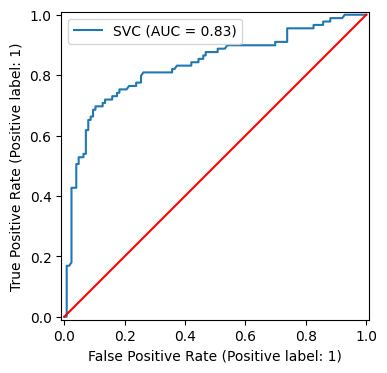

In [ ]:
# ROC Curve
from sklearn.metrics import RocCurveDisplay
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot()
RocCurveDisplay.from_estimator(svm_model, X_test_scale, y_test, ax=ax)
ax.plot([0, 1], [0, 1], color='red')
ax.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, auc
print(roc_auc_score(y_test, y_test_proba1))
print(auc(fpr, tpr))

0.8324415908685571
0.8324415908685571


## SVM - HELOC 데이터

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/hwda02/data/HELOC_Data.xlsx', engine = 'openpyxl')
df.head()
# 연령, 성별, 소득, HELOC 상품 제안 응답 여부(1: 응답함, 0: 응답안함)

,Age,Sex,Income,HELOC
0,30,Female,101000,0
1,25,Male,86000,0
2,20,Male,50000,0
3,26,Male,58000,0
4,18,Female,93000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     500 non-null    int64 
 1   Sex     500 non-null    object
 2   Income  500 non-null    int64 
 3   HELOC   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [ ]:
df['Sex'].unique()

array([' Female', ' Male'], dtype=object)

In [ ]:
df['Sex']= df['Sex'].str.replace(' ', '')

In [ ]:
df['Sex'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df['HELOC'].unique()

array([0, 1])

In [ ]:
df['HELOC'].value_counts()

,count
HELOC,
0,370
1,130


In [ ]:
df['HELOC'].value_counts(normalize = True)

,proportion
HELOC,
0,0.74
1,0.26


#### 데이터 분할

In [ ]:
df.columns

Index(['Age', 'Sex', 'Income', 'HELOC'], dtype='object')

In [ ]:
# 데이터 분할
# 전체 데이터
X = df.iloc[:,0:-1]
y = df['HELOC']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (500, 3)
y 데이터:  (500,)


In [ ]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터 = 7:3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (350, 3)
test 데이터:  (150, 3)


In [ ]:
# 더미변수
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
# Sex
print(X_train['Sex'])
X_train['Sex'] = label_encoder.fit_transform(X_train['Sex'])
print(X_train['Sex'])
print(X_test['Sex'])
X_test['Sex'] = label_encoder.transform(X_test['Sex'])
print(X_test['Sex'])

5        Male
116    Female
45     Female
16       Male
462    Female
        ...  
106    Female
270    Female
348    Female
435      Male
102    Female
Name: Sex, Length: 350, dtype: object
5      1
116    0
45     0
16     1
462    0
      ..
106    0
270    0
348    0
435    1
102    0
Name: Sex, Length: 350, dtype: int64
361    Female
73       Male
374    Female
155    Female
104      Male
        ...  
266    Female
23     Female
222    Female
261    Female
426      Male
Name: Sex, Length: 150, dtype: object
361    0
73     1
374    0
155    0
104    1
      ..
266    0
23     0
222    0
261    0
426    1
Name: Sex, Length: 150, dtype: int64


In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(X_train)
X_train_scale = standard.transform(X_train)
X_test_scale = standard.transform(X_test)

In [ ]:
# 모델 적용
from sklearn.svm import SVC
svm_model = SVC(kernel = 'rbf', probability=True)
svm_model.fit(X_train_scale, y_train)

SVC(probability=True)

In [ ]:
# 정확도
print(svm_model.score(X_train_scale, y_train))
print(svm_model.score(X_test_scale, y_test))

0.8285714285714286
0.8


### 성능평가

In [ ]:
y_train_pred = svm_model.predict(X_train_scale)
y_test_pred = svm_model.predict(X_test_scale)
print(y_train_pred[:5])
print(y_train.values[:5])
print(y_test_pred[:5])
print(y_test.values[:5])

[0 0 0 0 0]
[0 0 0 0 0]
[0 0 0 0 1]
[0 0 0 0 1]


In [ ]:
y_train_proba = svm_model.predict_proba(X_train_scale)
y_test_proba = svm_model.predict_proba(X_test_scale)
print(y_train_proba[:5])
print(y_test_proba[:5])

[[0.6206 0.3794]
 [0.8829 0.1171]
 [0.8836 0.1164]
 [0.9401 0.0599]
 [0.8772 0.1228]]
[[0.8813 0.1187]
 [0.9083 0.0917]
 [0.8835 0.1165]
 [0.878  0.122 ]
 [0.2444 0.7556]]


In [ ]:
# 정확도
print(np.mean(y_train == y_train_pred))
print(np.mean(y_test == y_test_pred))

0.8285714285714286
0.8


In [ ]:
# 성능평가
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[234  28]
 [ 32  56]]
[[90 18]
 [12 30]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       262
           1       0.67      0.64      0.65        88

    accuracy                           0.83       350
   macro avg       0.77      0.76      0.77       350
weighted avg       0.83      0.83      0.83       350

              precision    recall  f1-score   support

           0       0.88      0.83      0.86       108
           1       0.62      0.71      0.67        42

    accuracy                           0.80       150
   macro avg       0.75      0.77      0.76       150
weighted avg       0.81      0.80      0.80       150



In [ ]:
# ROC - 1 기준
y_test_proba1 = svm_model.predict_proba(X_test_scale)[:,1]

In [ ]:
# FPR, TPR, Cutoff
from sklearn.metrics import roc_curve
fpr, tpr, cut = roc_curve(y_test, y_test_proba1)

In [ ]:
cut_index = np.arange(1, cut.shape[0])
print(np.round(cut[cut_index], 2)) # 임계값

# 임계값에 따른 fpr, tpr
print('fpr:',np.round(fpr[cut_index], 2))
print('tpr:',np.round(tpr[cut_index], 2))

[0.83 0.83 0.78 0.77 0.73 0.72 0.71 0.71 0.71 0.7  0.7  0.69 0.67 0.64
 0.63 0.62 0.61 0.6  0.59 0.59 0.56 0.51 0.5  0.44 0.41 0.35 0.31 0.31
 0.3  0.3  0.29 0.23 0.16 0.15 0.14 0.12 0.12 0.12 0.12 0.12 0.12 0.11
 0.11 0.1  0.1  0.09 0.08 0.04]
fpr: [0.   0.01 0.01 0.03 0.03 0.05 0.05 0.06 0.06 0.06 0.06 0.07 0.07 0.09
 0.09 0.1  0.1  0.11 0.11 0.12 0.12 0.14 0.14 0.17 0.17 0.19 0.19 0.19
 0.19 0.2  0.2  0.23 0.23 0.26 0.26 0.36 0.36 0.47 0.47 0.51 0.51 0.89
 0.89 0.94 0.94 0.96 0.96 1.  ]
tpr: [0.02 0.02 0.12 0.12 0.31 0.31 0.36 0.36 0.38 0.38 0.43 0.43 0.45 0.45
 0.5  0.5  0.52 0.52 0.55 0.55 0.62 0.62 0.67 0.67 0.71 0.71 0.74 0.74
 0.76 0.76 0.79 0.79 0.81 0.81 0.83 0.83 0.86 0.86 0.9  0.9  0.93 0.93
 0.95 0.95 0.98 0.98 1.   1.  ]


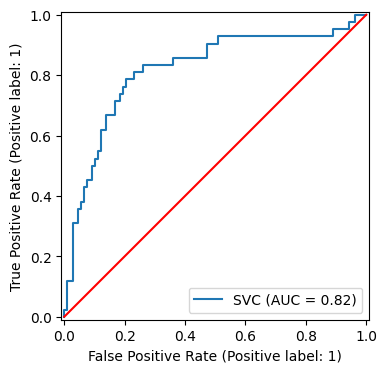

In [ ]:
# ROC Curve
from sklearn.metrics import RocCurveDisplay
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot()
RocCurveDisplay.from_estimator(svm_model, X_test_scale, y_test, ax=ax)
ax.plot([0, 1], [0, 1], color='red')
ax.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, auc
print(roc_auc_score(y_test, y_test_proba1))
print(auc(fpr, tpr))

0.8174603174603174
0.8174603174603174
